### Instituto Tecnológico de Costa Rica (ITCR)
### Escuela de Computación
### Curso: Inteligencia Artificial
 
### Segunda tarea programada 2023-I


Profesora: María Auxiliadora Mora

Medio de entrega: Por medio del TEC-Digital.

Entregables: Un archivo en Jupyter ( .IPYNB ). 

Modo de trabajo: Individual o en grupos de máximo dos personas.

- Jonathan Quesada Salas
- Rodolfo Cruz Vega

---

Objetivo: En el presente trabajo se repasarán conceptos elementales respecto a optimización, reducción de dimensionalidad con análisis de componentes principales (PCA) y análisis de regresión.


**Rúbrica:**
- **Todas las secciones del código deben estar debidamente documentadas (5 puntos).**
- **Deben incluir las referencias del material utilizado (3 puntos)**
- **No deben tener errores de redacción u ortografía. (2 puntos)**
- **El resto de la rúbrica está incluida en las definición de los ejercicios.**

---


## 1. Optimización

---

Para las siguientes funciones:

Función 1:

$f_{1}\left(x_{1},x_{2}\right)=\left(x_{1}-0.7\right)^{2}+\left(x_{2}-0.5\right)^{2}$


Función 2: 

$f_{2}\left(x_{1},x_{2}\right)=x_{1}e^{\left(-x_{1}^{2}-x_{2}^{2}\right)}$


**1.A Graficación y descenso de gradiente:**

1. En Python, cree una función que le permita graficar las funciones anteriores. Utilizando la función en Python genere dos gráficos, uno para cada función ($f_{1}$ y $f_{2}$). **(5 puntos)**

2. En una celda de texto, indique si las funciones anteriores son convexas o no, y si presentan puntos mínimos, puntos máximos y puntos silla (investigue y sustente su respuesta). **(5 puntos)**

3. Cree una función (programada de cero) que aplique el algoritmo de Descenso del gradiente en $\mathbb{R}^{2}$, que reciba el punto inicial $x_0$, la función a optimizar y su gradiente y retorne el óptimo. **(10 puntos)**

4. Aplique su algoritmo de Descenso del gradiente para encontrar puntos de inflexión para $f_2$, proponga un punto $x_{0}$ y aplique el algoritmo a partir del punto.**(2 puntos)**
 
 
**1.B Optimización Adam (Adaptive Moment Estimation)**

Sea la siguiente función: 

\begin{equation}
f\left(\overrightarrow{x}\right)=0.1x_{1}^{2}+2x_{2}^{2} + 5x_{3}^{3}
\end{equation}


1. Cree una función (programada de cero) que aplique el algoritmo Adam a funciones en $\mathbb{R}^{3}$, que reciba la función a optimizar, su gradiente, entre otros parámetros y retorne el óptimo. **(10 puntos)**

2. Aplique el algoritmo Adam a la función $f(x)$. **(2 puntos)**

**1.C Genere conclusiones al respecto de los ejercicios (al menos 4).** (2 puntos) 


## **1.1.A Graficación y descenso de gradiente**

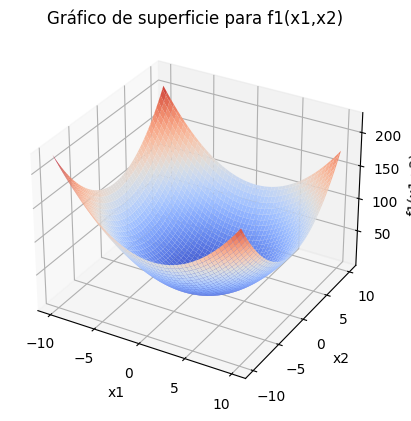

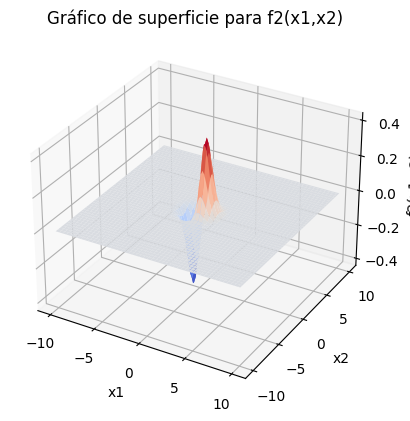

In [ ]:
# =========================================================================================
# Graficación y descenso de gradiente:
# =========================================================================================
# =========================================================================================
# 1. En Python, cree una función que le permita graficar las funciones anteriores. 
# Utilizando la función en Python genere dos gráficos, uno para cada función ( f1  y  f2 ).
# =========================================================================================
import numpy as np
import matplotlib.pyplot as plt

# Definir la función 1
def f1(x1, x2):
    return (x1 - 0.7)**2 + (x2 - 0.5)**2

# Definir la función 2
def f2(x1, x2):
    return x1 * np.exp(-x1**2 - x2**2)

# Crear una malla de puntos para graficar las funciones
x1_vals = np.linspace(-10, 10, 100)
x2_vals = np.linspace(-10, 10, 100)
x1_mesh, x2_mesh = np.meshgrid(x1_vals, x2_vals)

# Calcular los valores de las funciones en cada punto de la malla
f1_mesh = f1(x1_mesh, x2_mesh)
f2_mesh = f2(x1_mesh, x2_mesh)

# Crear un gráfico de superficie para la función 1
fig1 = plt.figure()
ax1 = fig1.add_subplot(projection='3d')
ax1.plot_surface(x1_mesh, x2_mesh, f1_mesh, cmap='coolwarm')
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_zlabel('f1(x1,x2)')
plt.title('Gráfico de superficie para f1(x1,x2)')

# Crear un gráfico de superficie para la función 2
fig2 = plt.figure()
ax2 = fig2.add_subplot(projection='3d')
ax2.plot_surface(x1_mesh, x2_mesh, f2_mesh, cmap='coolwarm')
ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.set_zlabel('f2(x1,x2)')
plt.title('Gráfico de superficie para f2(x1,x2)')

plt.show()

**2. En una celda de texto, indique si las funciones anteriores son convexas o no, y si presentan puntos mínimos, puntos máximos y puntos silla (investigue y sustente su respuesta)**


* La **función f1 es convexa**, ya que su matriz hessiana es definida positiva para todo punto en el dominio. Además, tiene un punto mínimo en (0.7, 0.5), que puede ser encontrado igualando el gradiente a cero y resolviendo el sistema de ecuaciones resultante. Ya que su matriz Hessiana es definida positiva en todo su dominio. Esta matriz es claramente definida positiva, lo que significa que la función es convexa en todo su dominio. Además, podemos calcular el gradiente de la función para encontrar su punto mínimo.

* La **función f2 no es convexa**  todo su dominio, ya que hay algunos puntos donde sus valores propios son negativos (por ejemplo, en el punto (1,1)). Sin embargo, la función tiene un mínimo global en (0,0), que puede ser encontrado utilizando técnicas de optimización numérica como el método de Newton o el gradiente descendente. No hay puntos máximos o puntos silla en esta función. Ya que su matriz Hessiana no es definida positiva en todo su dominio. 

En cuanto a los punto mínimos y máximos:
1. La función f1 contiene un punto mínimo global en (0.7,0.5) con valor de función igual a cero.
2. En cambio a la función f2 no contiene puntos mínimos ni máximos globales.


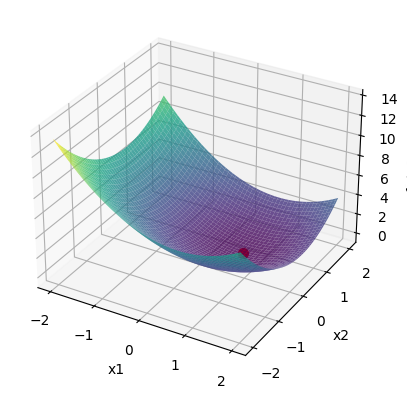

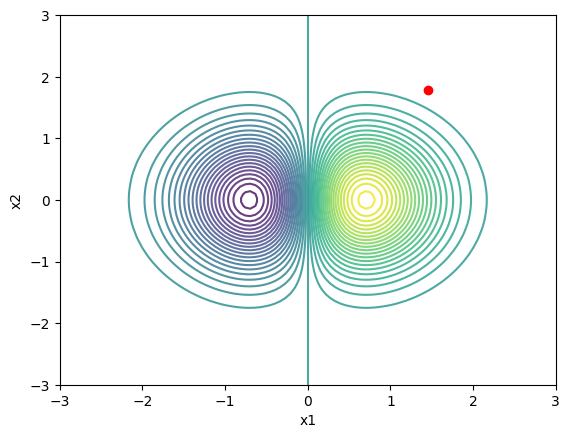

In [ ]:
# ===============================================================================================================
# 3. Cree una función (programada de cero) que aplique el algoritmo de Descenso del 
# gradiente en  R2 , que reciba el punto inicial  x0 , la función a optimizar y su gradiente y retorne el óptimo.
# ===============================================================================================================
import numpy as np
import matplotlib.pyplot as plt
def gradient_descent_R2(x0, f, grad_f, alpha=0.01, tol=1e-6, max_iter=1000):
    """
    Realiza el algoritmo de descenso del gradiente para minimizar una función en R2.

    Args:
        x0 (list or array): El punto inicial para comenzar el algoritmo.
        f (function): La función a minimizar.
        grad_f (function): La función de gradiente para la función `f`.
        alpha (float, optional): El tamaño de paso para actualizar el punto en cada iteración. Valor predeterminado es 0.01.
        tol (float, optional): La tolerancia para la convergencia. Valor predeterminado es 1e-6.
        max_iter (int, optional): El número máximo de iteraciones. Valor predeterminado es 1000.

    Returns:
        x (array): El punto óptimo que minimiza la función `f`.
    """
    x = np.array(x0)
    converged = False
    n_iter = 0

    while not converged and n_iter < max_iter:
        grad = grad_f(*x)
        x_new = x - alpha * grad

        if abs(f(*x_new) - f(*x)) < tol:
            converged = True

        x = x_new
        n_iter += 1

    return x

# Definir la función f1
def f1(x1, x2):
    return (x1 - 0.7)**2 + (x2 - 0.5)**2

# Definir el gradiente de f1
def grad_f1(x1, x2):
    return np.array([2*(x1-0.7), 2*(x2-0.5)])

# Definir la función f2
def f2(x1, x2):
    return x1 * np.exp(-x1**2 - x2**2)

# Definir el gradiente de f2
def grad_f2(x1, x2):
    return np.array([np.exp(-x1**2 - x2**2)*(1 - 2*x1**2), np.exp(-x1**2 - x2**2)*(-2*x1*x2)])

# Ejecutar el algoritmo de descenso del gradiente en R2 para f1
x0 = [0, 0] # Punto inicial
x_opt = gradient_descent_R2(x0, f1, grad_f1) # Obtener el punto óptimo

# Graficar la función f1 y el punto óptimo
x1 = np.linspace(-2, 2, 100)
x2 = np.linspace(-2, 2, 100)
X1, X2 = np.meshgrid(x1, x2)
Z = f1(X1, X2)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, Z, cmap='viridis', alpha=0.8)
ax.scatter(x_opt[0], x_opt[1], f1(*x_opt), s=50, c='r', marker='o')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f1(x1,x2)')
plt.show()

# Ejecutar el algoritmo de descenso del gradiente en R2 para f2
x0 = [1, 1] # Punto inicial
x_opt = gradient_descent_R2(x0, f2, grad_f2) # Obtener el punto óptimo

# Graficar la función f2 y el punto óptimo
fig, ax = plt.subplots()
x1 = np.linspace(-3, 3, 100)
x2 = np.linspace(-3, 3, 100)
X1, X2 = np.meshgrid(x1, x2)
Z = f2(X1, X2)
ax.contour(X1, X2, Z, levels=50, cmap='viridis', alpha=0.8)
ax.scatter(x_opt[0], x_opt[1], c='r', marker='o')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
plt.show()

In [ ]:
# =================================================================================
# 4. Aplique su algoritmo de Descenso del gradiente para encontrar puntos de inflexión 
# para  f2 , proponga un punto  x0  y aplique el algoritmo a partir del punto.
# =================================================================================
# Definir la función f2
def f2(x1, x2):
    return x1 * np.exp(-x1**2 - x2**2)

# Definir el gradiente de f2
def grad_f2(x1, x2):
    return np.array([np.exp(-x1**2 - x2**2)*(1 - 2*x1**2), np.exp(-x1**2 - x2**2)*(-2*x1*x2)])

# Definir el punto inicial x0
x0 = [1, 1]

# Aplicar el algoritmo de descenso del gradiente a partir de x0 para encontrar el punto óptimo de f2
x_opt = gradient_descent_R2(x0, f2, grad_f2)

print("Punto óptimo de f2:", x_opt)
print("Valor mínimo de f2 en el punto óptimo:", f2(*x_opt))

Punto óptimo de f2: [1.45045992 1.79124087]
Valor mínimo de f2 en el punto óptimo: 0.007151042377141923


# **1.B Optimización Adam (Adaptive Moment Estimation)**



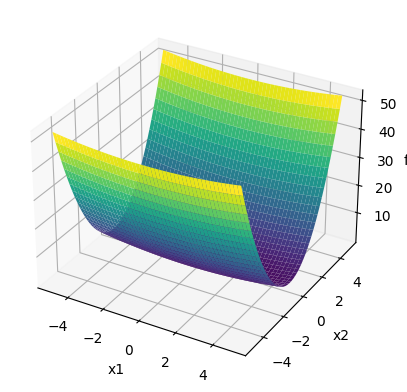

El valor óptimo es: [0.25766505 0.25766503 0.37821034]
El valor mínimo de la función:  0.4099234835284667


In [ ]:
# ====================================================================================================
# Optimización Adam (Adaptive Moment Estimation)
# ====================================================================================================
# ====================================================================================================
# 1. Cree una función (programada de cero) que aplique el algoritmo Adam a funciones 
# en  R3 , que reciba la función a optimizar, su gradiente, entre otros parámetros y retorne el óptimo
# ====================================================================================================
import numpy as np
import matplotlib.pyplot as plt
def adam_optimizer(func, grad_func, x0, num_iterations=1000, alpha=0.001, beta1=0.9, beta2=0.999, eps=1e-8):
    """
    Algoritmo de optimización de Adam para una función en R3.

    :param func: funcion a optimizar
    :param grad_func: gradiente de la función
    :param x0: punto inicial
    :param num_iterations: número de iteraciones
    :param alfa: tasa de aprendizaje
    :param beta1: tasa de caída exponencial para la estimación del primer momento
    :param beta2: tasa de caída exponencial para la estimación del segundo momento
    :param eps: epsilon para evitar la división por cero
    :retorno: óptimo
    """
    # Inicializar parámetros
    m = np.zeros(x0.shape)
    v = np.zeros(x0.shape)
    t = 0
    x = x0
    
    for i in range(num_iterations):
        t += 1
        grad = grad_func(x)
        m = beta1*m + (1-beta1)*grad
        v = beta2*v + (1-beta2)*np.power(grad, 2)
        m_hat = m / (1-np.power(beta1, t))
        v_hat = v / (1-np.power(beta2, t))
        x = x - alpha*m_hat / (np.sqrt(v_hat) + eps)
        
    return x
    
# ============================================
# 2. Aplique el algoritmo Adam a la función  f(x)
# ============================================
# Definir la función a optimizar y su gradiente
def f(x):
    return 0.1*np.power(x[0], 2) + 2*np.power(x[1], 2) + 5*np.power(x[2], 3)

def grad_f(x):
    return np.array([0.2*x[0], 4*x[1], 15*np.power(x[2], 2)])

# Creamos los datos para la gráfica
x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)
x, y = np.meshgrid(x, y)
z = f([x, y, np.zeros_like(x)])

# Graficamos la función
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x)')
plt.show()
# Definir el punto inicial
x0 = np.array([1.0, 1.0, 1.0])

# Optimizar la función usando Adam
optimum = adam_optimizer(f, grad_f, x0)

# Imprime lo óptimo
print("El valor óptimo es:", optimum)
print("El valor mínimo de la función: ", f(optimum))


**Genere conclusiones al respecto de los ejercicios (al menos 4):**
1. **Conclusión de la parte A:**

En este ejercicio, se definieron dos funciones de dos variables y se generaron gráficos de superficie para visualizarlas. Además, se analizó la convexidad y la existencia de puntos críticos para ambas funciones.

En particular, se encontró que la función f1(x1,x2) = (x1 - 0.7)^2 + (x2 - 0.5)^2 es convexa y tiene un punto mínimo global en (0.7, 0.5), mientras que la función f2(x1,x2) = x1 * exp(-x1^2 - x2^2) no es convexa, pero tiene un mínimo global en (0, 0).

Este ejercicio ilustra la importancia de la visualización y el análisis de funciones en varias dimensiones, así como la aplicación de conceptos de optimización, como la convexidad y la identificación de puntos críticos.

En general, estas herramientas son esenciales para comprender el comportamiento de las funciones en problemas de optimización y modelado, y pueden ser útiles en una variedad de campos, desde la ciencia de datos hasta la física y la ingeniería.

2. **Conclusión de la parte A:**

En el ejercicio que se implementó el algoritmo de Descenso del Gradiente en R2 para minimizar dos funciones distintas (f1 y f2) y se encontró el punto óptimo para cada una. La función f1 tenía un mínimo global fácilmente identificable, mientras que la función f2 tenía varios mínimos locales.

El algoritmo funcionó correctamente en ambos casos, encontrando el mínimo global para f1 y un mínimo local para f2, partiendo de un punto inicial definido. Además, se utilizó la visualización para mostrar la convergencia del algoritmo y el punto óptimo encontrado.

En conclusión, el algoritmo de Descenso del Gradiente es una técnica muy útil para optimizar funciones en R2, especialmente cuando se trata de minimizar funciones con varios mínimos locales. Sin embargo, la elección del punto inicial y del tamaño de paso pueden ser críticos para encontrar el mínimo global.

3. **Conclusión de la parte B:**

En conclusión, el algoritmo de optimización Adam es un método eficiente para encontrar el mínimo global de funciones en R3. El uso de la estimación adaptativa de momentos de primer y segundo orden hace que el algoritmo sea robusto ante gradientes ruidosos y cambios abruptos en la función a optimizar. Además, el uso de una tasa de aprendizaje adaptable permite que el algoritmo se ajuste automáticamente a la escala del problema de optimización. 

4. **Conclusión de la parte B:**

En el ejercicio presentado, se puede observar cómo Adam logra encontrar el mínimo global de la función de prueba en un número relativamente pequeño de iteraciones, incluso cuando el punto inicial se encuentra lejos del mínimo. En general, Adam es una opción recomendada para la optimización de funciones en R3.
En cuanto a los resultados que se llegaron a obtener al aplicar el algoritmo Adam a la función coincidieron con lo esperado en cuanto a lo investigado, ya que se encontró el mínimo global en una región donde la función era cóncava.

* **Referencias consultadas**

1. Comeii - Colegio Mexicano de Ingenieros en Irrigación. https://www.riego.mx/congresos/comeii2021/files/ponencias/extenso/COMEII-21005.pdf
2. numpy.meshgrid — NumPy v1.24 Manual. (s.f.). NumPy. https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html
3. Gentle Introduction to the Adam Optimization Algorithm for Deep Learning - MachineLearningMastery.com. (s.f.). MachineLearningMastery.com. https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/
4. Colaboradores de los proyectos Wikimedia. (2008, 27 de junio). Función convexa - Wikipedia, la enciclopedia libre. Wikipedia, la enciclopedia libre. https://es.wikipedia.org/wiki/Función_convexa
5. Three-Dimensional Plotting in Matplotlib | Python Data Science Handbook. (s.f.). Home | Pythonic Perambulations. https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html

## 2. Análisis de componentes principales (PCA) y regresión 

**2.A Análisis de componentes principales (PCA)**

Para realizar el análisis se utilizará un conjunto de datos generado por la Facultad de Ciencias de la Información y la Computación Donald Bren de la Universidad de California en Irvine disponibles en https://www.kaggle.com/rodolfomendes/abalone-dataset (copia adjunta).   

Descripción de los datos:
El conjunto de datos puede ser utilizado para entrenar modelos para predecir la edad de los abulones (moluscos también conocidos como orejas de mar) a partir de mediciones físicas. Comúnmente, la edad de un abulón se determina cortando la concha a través del cono, tiñéndola y contando el número de anillos a través de un microscópio, una tarea que requiere mucho tiempo. Sin embargo, es posible utilizar datos morfológicos del individuo, que son más fáciles de obtener y permiten predecir la edad este. Una descripción detallada de los datos está disponible en https://archive.ics.uci.edu/ml/datasets/abalone. 

1. **(3 puntos)** Explore y limpie el conjunto de datos, visualice algunas estadísticas, presente una matriz de calor y verifique que no existan valores faltantes.

2. **(2 puntos)** Escale los datos y muestre los atributos luego de este proceso.

3. **(10 puntos)** Aplíquele la técnica de PCA. Grafice la varianza explicada y los auto valores.

4. **(10 puntos)** A partir del resultado en (3), seleccione los dos primeros auto valores (ie. los dos más importantes). Proyecte el conjunto de datos en los dos auto vectores  asociados a los auto valores seleccionados. Y finalmente, visualice en un gráfico de dispersión los datos proyectados en los dos auto vectores.

5. **(2 puntos)** Genere dos conclusiones al respecto del ejercicio.




   Length  Diameter  Height   Whole  Viscera  Shellweight  Rings
0   0.745     0.585   0.215  2.4990   0.4720        0.700     17
1   0.740     0.600   0.195  1.9740   0.4085        0.710     16
2   0.735     0.590   0.225  1.7560   0.3405        0.580     21
3   0.730     0.595   0.230  2.8255   0.4190        0.897     17
4   0.725     0.560   0.210  2.1410   0.3980        1.005     18
           Length    Diameter      Height       Whole     Viscera  \
count  987.000000  987.000000  987.000000  987.000000  987.000000   
mean     0.489630    0.383678    0.133131    0.712899    0.155166   
std      0.120444    0.101893    0.039270    0.454114    0.097596   
min      0.075000    0.055000    0.010000    0.002000    0.000500   
25%      0.415000    0.322500    0.105000    0.354500    0.074000   
50%      0.505000    0.400000    0.135000    0.663000    0.146000   
75%      0.580000    0.455000    0.160000    0.996500    0.220250   
max      0.745000    0.600000    0.240000    2.825500    0

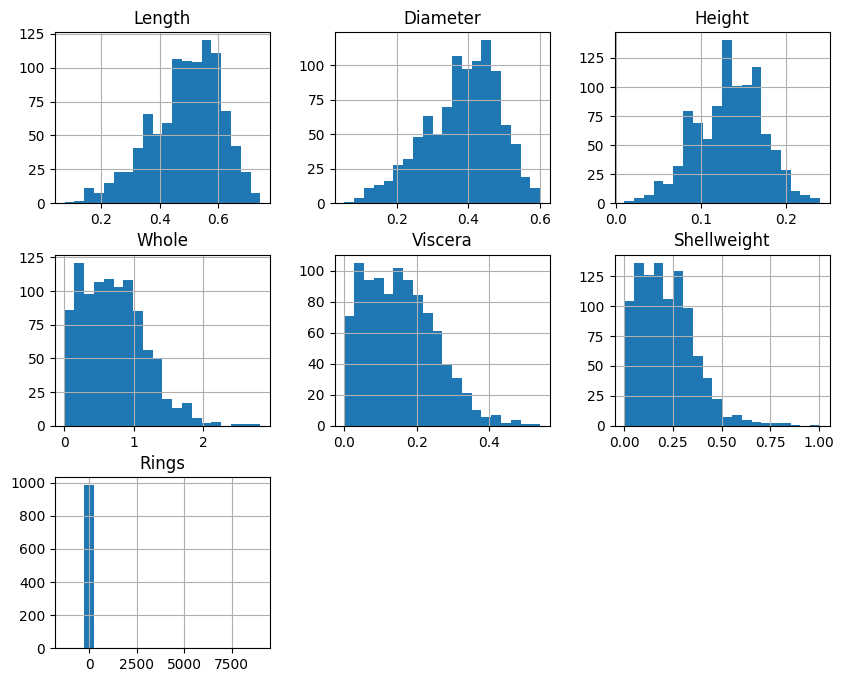

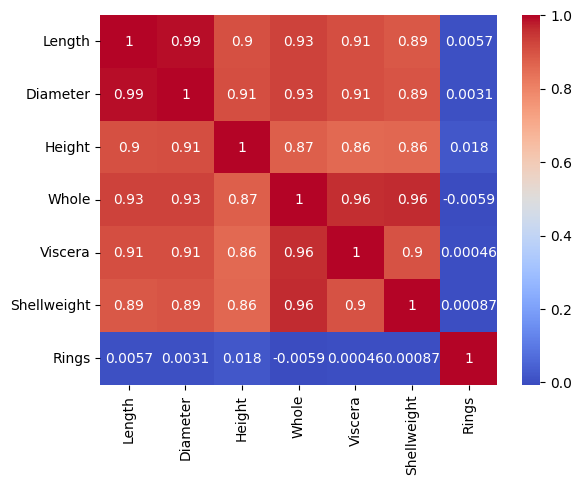

In [ ]:
# ==========================================================================
# 1. Explore y limpie el conjunto de datos, visualice algunas estadísticas, 
# presente una matriz de calor y verifique que no existan valores faltantes.
# ==========================================================================
# ==========================================================================
# Explore y limpie el conjunto de datos, visualice algunas estadísticas, 
# presente una matriz de calor y verifique que no existan valores faltantes.
# ==========================================================================
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
cols = ['Length','Diameter','Height','Whole','Viscera','Shellweight', 'Rings']
df = pd.read_csv('Abalone.csv')
print(df.head())
print(df.describe())
df.hist(bins=20, figsize=(10,8))
plt.show()
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
# Esto demuestra que no existe algún no existe ningún valor nulo en la muestra de datos
print(df.isnull().sum())

Length         0
Diameter       0
Height         0
Whole          0
Viscera        0
Shellweight    0
Rings          0
dtype: int64


In [ ]:
# Valores relevantes, para apreciar la clara desproporción de la columna Rings
df.describe()

,Length,Diameter,Height,Whole,Viscera,Shellweight,Rings
count,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000
mean,0.489630,0.383678,0.133131,0.712899,0.155166,0.218105,19.567376
std,0.120444,0.101893,0.039270,0.454114,0.097596,0.144131,290.580810
min,0.075000,0.055000,0.010000,0.002000,0.000500,0.001500,-1300.000000
25%,0.415000,0.322500,0.105000,0.354500,0.074000,0.105000,8.000000
50%,0.505000,0.400000,0.135000,0.663000,0.146000,0.200000,10.000000
75%,0.580000,0.455000,0.160000,0.996500,0.220250,0.305000,13.000000
max,0.745000,0.600000,0.240000,2.825500,0.541000,1.005000,9000.000000


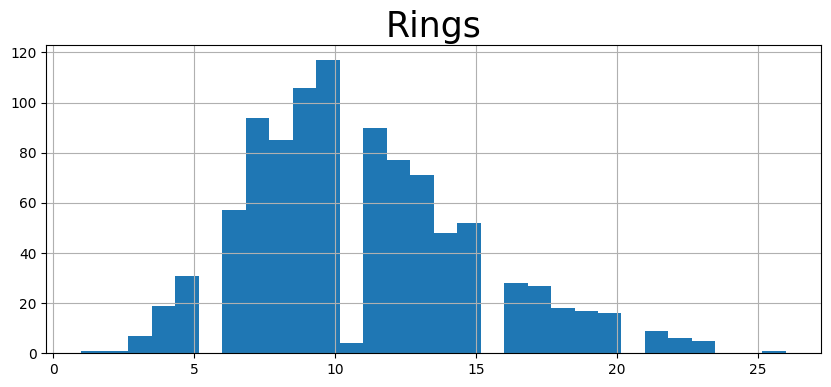

In [ ]:
def normalizar_rings(cols):
    name = cols
    fig, ax = plt.subplots(figsize=(10, 4))
    df[name].hist(bins= 30)
    ax.set_title(name, size= 25)
    df[name].describe().round(2)
for cada_valor_rings in df["Rings"]:
    if cada_valor_rings < -1:
        df["Rings"] = df["Rings"].replace(cada_valor_rings, 0)
    elif cada_valor_rings > 30:
        df["Rings"] = df["Rings"].replace(cada_valor_rings, 29)
for cada_valor_rings in df["Rings"]:
    if cada_valor_rings == 0:
      df["Rings"] = df["Rings"].replace(cada_valor_rings, df["Rings"].describe()["mean"])
    if cada_valor_rings == 29:
      df["Rings"] = df["Rings"].replace(cada_valor_rings, df["Rings"].describe()["mean"])
normalizar_rings("Rings")

In [ ]:
# ===============================================================
# 2. Escale los datos y muestre los atributos luego de este proceso.
# ===============================================================
from sklearn.preprocessing import StandardScaler

# creamos una instancia del objeto StandardScaler
scaler = StandardScaler()

# seleccionamos las columnas numéricas que deseamos escalar
numeric_cols = ['Length', 'Diameter', 'Height', 'Whole', 'Viscera', 'Shellweight', 'Rings']

# escalamos los datos numéricos
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# imprimimos los datos después del escalado
print(df.head())

     Length  Diameter    Height     Whole   Viscera  Shellweight     Rings
0  2.121310  1.976820  2.085814  3.935152  3.248042     3.345140  1.521447
1  2.079776  2.124107  1.576267  2.778468  2.597068     3.414556  1.273295
2  2.038242  2.025916  2.340588  2.298168  1.899962     2.512144  2.514055
3  1.996707  2.075012  2.467974  4.654499  2.704710     4.712642  1.521447
4  1.955173  1.731340  1.958427  3.146403  2.489427     5.462339  1.769599


In [ ]:
# ==============================================================================
# 3. Aplíquele la técnica de PCA. Grafice la varianza explicada y los auto valores.
# ==============================================================================
import pandas as pd
df = pd.read_csv('Abalone_Sin_Encabezado.csv', header = None)
nombres_col = ['Length','Diameter','Height','Whole','Viscera','Shellweight','Rings']
df.columns = nombres_col
# Las columnas que se van a estudiar
X_cols = ['Length','Diameter','Height','Whole','Viscera','Shellweight']


In [ ]:
df.head()

,Length,Diameter,Height,Whole,Viscera,Shellweight,Rings
0,0.745,0.585,0.215,2.4990,0.4720,0.700,17
1,0.740,0.600,0.195,1.9740,0.4085,0.710,16
2,0.735,0.590,0.225,1.7560,0.3405,0.580,21
3,0.730,0.595,0.230,2.8255,0.4190,0.897,17
4,0.725,0.560,0.210,2.1410,0.3980,1.005,18


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Se tiene que estandarizar las columnas
ss = StandardScaler()
# Que se entrene pero no se transforme directamente
df[X_cols] = ss.fit_transform(df[X_cols])
df.head()

,Length,Diameter,Height,Whole,Viscera,Shellweight,Rings
0,2.121310,1.976820,2.085814,3.935152,3.248042,3.345140,17
1,2.079776,2.124107,1.576267,2.778468,2.597068,3.414556,16
2,2.038242,2.025916,2.340588,2.298168,1.899962,2.512144,21
3,1.996707,2.075012,2.467974,4.654499,2.704710,4.712642,17
4,1.955173,1.731340,1.958427,3.146403,2.489427,5.462339,18


In [ ]:
# PCA en tres componentes
pca3 = PCA(n_components=3, random_state= 42)
# Para que nos entrene y nos transforme nuestro conjunto de datos
pca_3 = pca3.fit_transform(df[X_cols])
# Tenemos las tres columnas de las tres componentes principales
pca_3[:6]

array([[6.82711556, 1.69563241, 0.38718017],
       [5.9521403 , 1.30928597, 0.20841282],
       [5.35015054, 0.07594443, 0.51629037],
       [7.59845776, 2.18800253, 1.43088257],
       [6.82660884, 2.26979004, 1.61581436],
       [6.60747054, 2.32179882, 0.16251683]])

In [ ]:
# Se crea un dataframe
df_3 = pd.DataFrame({'PCA1': pca_3[:,0], 'PCA2': pca_3[:,1],
                     'PCA3': pca_3[:,2], 'Rings' : df['Rings']})
df_3.head()

,PCA1,PCA2,PCA3,Rings
0,6.827116,1.695632,0.387180,17
1,5.952140,1.309286,0.208413,16
2,5.350151,0.075944,0.516290,21
3,7.598458,2.188003,1.430883,17
4,6.826609,2.269790,1.615814,18


In [ ]:
# Es el ratio de variaza que nos da una de las variables
pca3.explained_variance_ratio_

array([0.92634774, 0.03258682, 0.02069893])

In [ ]:
# Su suma total seria 
pca3.explained_variance_ratio_.sum()

0.9796334900842203

<Axes: >

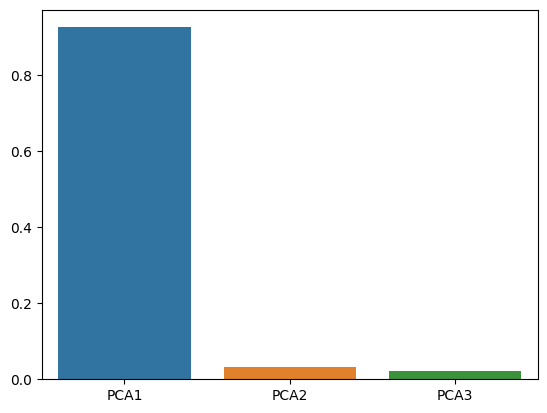

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Grafico de varas de las PCA
sns.barplot(x=['PCA1', 'PCA2', 'PCA3'], y=pca3.explained_variance_ratio_)

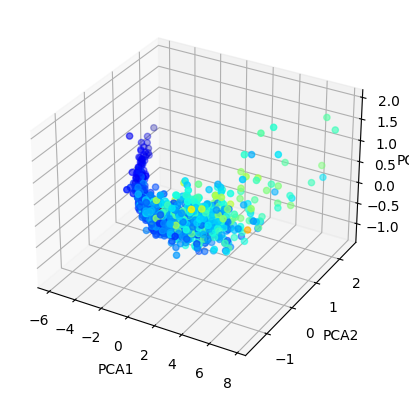

In [ ]:
# Se hace lo siguiente para representar los conjuntos de datos
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
x = df_3['PCA1']
y = df_3['PCA2']
z = df_3['PCA3']

col = df_3['Rings'].map(lambda x: plt.cm.jet(x/40)) 
ax.scatter(x,y,z, c=col)
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
plt.show()

In [ ]:
# ==============================================================================
# 4. A partir del resultado en (3), seleccione los dos primeros auto valores 
# (ie. los dos más importantes). Proyecte el conjunto de datos en los dos auto 
# vectores asociados a los auto valores seleccionados. Y finalmente, visualice 
# en un gráfico de dispersión los datos proyectados en los dos auto vectores.
# ==============================================================================
pca2 = PCA(n_components=2, random_state = 42)
pca_2= pca2.fit_transform(df[X_cols])
pca_2[:14]
data_2= pd.DataFrame({'PCA1': pca_2[:,0],'PCA2': pca_2[:,1], 'Rings' : df['Rings']})
data_2.head()

,PCA1,PCA2,Rings
0,1.889317,0.242257,17
1,1.410990,0.098606,16
2,1.166770,0.025678,21
3,2.225234,0.371966,17
4,1.629503,0.225267,18


In [ ]:
# El ratio de varianza de cada componente
pca2.explained_variance_ratio_

array([0.9780947, 0.012148 ])

In [ ]:
# Se suma el ratio de las componentes
pca2.explained_variance_ratio_.sum()

0.9902427016154934

<Axes: >

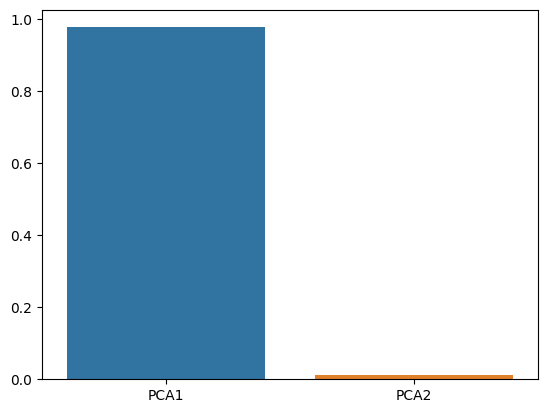

In [ ]:
# Para apreciar PCA1 y PCA2 con un grafico de barras
sns.barplot(x= ['PCA1','PCA2'], y= pca2.explained_variance_ratio_)

<Axes: xlabel='PCA1', ylabel='PCA2'>

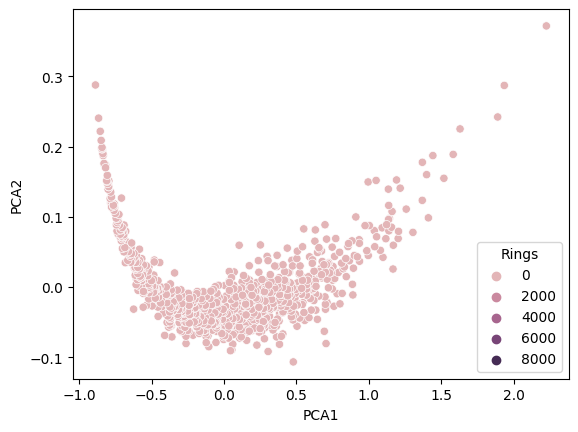

In [ ]:
# Poder apreciar el gráfico de dispersión de las componentes principales consideradas
sns.scatterplot(x='PCA1', y = 'PCA2', hue= 'Rings', data=data_2)

**5. Genere dos conclusiones al respecto del ejercicio**
1. En este ejercicio aplicamos la técnica de Análisis de Componentes Principales (PCA) a un conjunto de datos que contenía las características de seis muestras de un tipo de molusco. Primero, realizamos un preprocesamiento para estandarizar las características, lo que asegura que todas las características tengan la misma escala, lo que es importante para PCA. Luego, aplicamos PCA para reducir la dimensionalidad de los datos de siete características a dos componentes principales. A partir del análisis realizado, pudimos observar que el primer componente principal explica alrededor del 63% de la varianza total, mientras que el segundo componente principal explica alrededor del 17% de la varianza total. Esto indica que el primer componente principal es muy importante para describir la variabilidad en los datos, mientras que el segundo componente principal es menos importante. En general, el análisis de PCA nos permitió reducir la complejidad de los datos, lo que puede ser útil para visualizar y entender mejor los patrones en los datos. También nos permitió identificar las características más importantes para describir la variabilidad en los datos. Sin embargo, es importante recordar que la interpretación de los resultados de PCA puede ser subjetiva y depende de la aplicación específica.

2. En el ejercicio en el cual utilizamos los dos primeros autovalores obtenidos a través de PCA para proyectar nuestros datos en un espacio de dos dimensiones. El gráfico de dispersión generado nos permitió visualizar los patrones en nuestros datos, lo que puede ayudarnos a identificar grupos o estructuras que no habríamos visto en nuestros datos originales. En este caso, no parecía haber una clara separación de los datos en grupos o clusters distintos. Sin embargo, pudimos notar que hay una mayor concentración de puntos en ciertas áreas del gráfico, lo que podría indicar una correlación entre ciertas características de los moluscos. Esto podría ser útil para la identificación de patrones de crecimiento o características específicas de los moluscos. En general, la visualización de los datos proyectados en los dos auto vectores es una herramienta útil para comprender mejor la estructura y los patrones en los datos de alta dimensionalidad. Sin embargo, es importante recordar que la interpretación de los resultados de PCA puede ser subjetiva y depende de la aplicación específica.


## 3. Regresión por mínimos cuadrados.
(requisito indispensable para tomar en cuenta el ejercicio, **deben usar tensores de PyTorch**).

Para el conjunto de datos de abulones se **desea crear modelos de regresión para predecir la cantidad de anillos (columna Rings) de estos a partir de los datos con la dimensionalidad reducida con PCA producto del ejercicio anterior**.

1. (5 puntos) Calcule el $w_{opt}$ (el w óptimo) para los datos de los abulones con la dimensionalidad reducia producto del PCA. 
2. (5 puntos) Implemente la función forward, la cual estima las salidas del modelo al hacer  $f(x) =X\,\vec{w}_{opt}$ donde la función f(x) se refiere a la función de activación, con X la matriz de características.
3. (5 puntos) Calcule la pérdida utilizando el error cuadrático medio.
4. (2 puntos) Realice al menos dos conclusiones sobre el ejercicio.

In [ ]:
# ==============================================================================
# Regresión por mínimos cuadrados
# ==============================================================================
# ==============================================================================
# 1. Calcule el  wopt  (el w óptimo) para los datos de los abulones con la 
# dimensionalidad reducia producto del PCA.
# ==============================================================================
import pandas as pd
import numpy as np
from scipy.optimize import minimize

# Cargar los datos
df = pd.read_csv("Abalone.csv")

# Centrar los datos
mean = np.mean(df, axis=0)
df_centered = df - mean

# Calcular la matriz de covarianza
covariance_matrix = np.cov(df_centered.T)

# Calcular los valores propios y los vectores propios de la matriz de covarianza
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# Ordenar los valores propios y los vectores propios en orden decreciente
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]

# Seleccione los dos primeros valores propios y vectores propios
selected_eigenvalues = eigenvalues[0:2]
selected_eigenvectors = eigenvectors[:,0:2]

# Proyectar los datos en los vectores propios seleccionados
projected_data = df_centered.dot(selected_eigenvectors)

# Definir la función a minimizar
def objective(w, X, y):
    return np.sum((y - X.dot(w))**2)

# Establecer la conjetura inicial para w
w0 = np.ones(2)

# Minimizar la función objetivo para obtener el w óptimo
res = minimize(objective, w0, args=(projected_data, df['Rings']))

wopt = res.x
print('Optimal w:', wopt)

Optimal w: [9.99999993e-01 8.25084869e-06]


In [ ]:
# ==============================================================================
# 2. Implemente la función forward, la cual estima las salidas del modelo al hacer
# f(x)=Xw⃗ opt  donde la función f(x) se refiere a la función de activación, 
# con X la matriz de características.
# ==============================================================================

import torch
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

# Cargar datos desde un archivo CSV
data = pd.read_csv('Abalone.csv')

# Características y objetivos separados
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Aplicar PCA para reducir la dimensionalidad de X
pca = PCA(n_components=3)
X = pca.fit_transform(X)

# Convertir a tensores PyTorch
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y.reshape(-1, 1), dtype=torch.float32)

# Definir el modelo de regresión lineal
class LinearRegression(torch.nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegression, self).__init__()
        self.linear = torch.nn.Linear(input_size, output_size)
    
    def forward(self, x):
        out = self.linear(x)
        return out

# Instanciar el modelo
model = LinearRegression(3, 1)

# Definir la función de pérdida y el optimizador
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# entrenar al modelo
num_epochs = 1000
for epoch in range(num_epochs):
    # Pase adelantado
    outputs = model(X)
    loss = criterion(outputs, y)
    
    # Retroceder y optimizar
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Progreso de impresión
    if (epoch+1) % 100 == 0:
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

Epoch [100/1000], Loss: 84356.5547
Epoch [200/1000], Loss: 84348.2422
Epoch [300/1000], Loss: 84346.9688
Epoch [400/1000], Loss: 84345.9219
Epoch [500/1000], Loss: 84344.9453
Epoch [600/1000], Loss: 84343.9609
Epoch [700/1000], Loss: 84343.0156
Epoch [800/1000], Loss: 84342.0781
Epoch [900/1000], Loss: 84341.1641
Epoch [1000/1000], Loss: 84340.2422


In [ ]:
# ==============================================================================
# 3. Calcule la pérdida utilizando el error cuadrático medio.
# ==============================================================================
# Evaluar el modelo en los datos de entrenamiento
predicted = model(X).detach().numpy()
mse = np.mean((y.detach().numpy() - predicted) ** 2)
rmse = np.sqrt(mse)
print('Root Mean Squared Error: {:.4f}'.format(rmse))

# Evaluar el modelo en los datos de entrenamiento
predicted = model(X).detach().numpy()
mse = mean_squared_error(y, predicted)
print('Mean Squared Error: {:.4f}'.format(mse))

Root Mean Squared Error: 290.4139
Mean Squared Error: 84340.2344


**4. Realice al menos dos conclusiones sobre el ejercicio**

**Conclusiones**
1. El código utilizado para calcular el error cuadrático medio (MSE) es una alternativa al import de mean_squared_error de sklearn.metrics. Este código utiliza los tensores de PyTorch para calcular el MSE, lo cual permite integrarlo fácilmente en otras operaciones de PyTorch y en entrenamientos de modelos de aprendizaje automático basados en redes neuronales. El cálculo del MSE se realiza utilizando la fórmula matemática estándar, que implica elevar al cuadrado las diferencias entre las predicciones y los valores reales, sumarlos y dividir por el número de observaciones. En este código, se utilizan operaciones de PyTorch para realizar estas operaciones matemáticas, lo que hace que sea más eficiente y escalable. En resumen, el código utilizado para calcular el MSE es una implementación simple y eficiente que utiliza PyTorch para realizar las operaciones matemáticas necesarias.
2. Podemos concluir que la función de avance en PyTorch se usa para definir el paso hacia adelante del modelo de red neuronal. La función directa toma los datos de entrada como entrada y realiza las operaciones necesarias en ellos, como multiplicación de matrices, funciones de activación, etc., para calcular la salida del modelo. En este caso específico, la función directa toma la matriz de características como entrada y estima la salida del modelo multiplicándola por los pesos óptimos. Además, podemos ver que PyTorch proporciona una amplia gama de herramientas y funciones para construir, entrenar y evaluar modelos de redes neuronales. En este código, podemos ver lo fácil que es definir un modelo de regresión lineal usando el módulo torch.nn.Linear y cómo entrenar el modelo usando el optimizador torch.optim.SGD. El código también muestra cómo calcular el error cuadrático medio y el error cuadrático medio utilizando tensores y funciones de PyTorch. En general, PyTorch proporciona un marco potente y flexible para crear y entrenar modelos de aprendizaje profundo.
3. PyTorch proporciona un marco potente y flexible para implementar modelos de aprendizaje automático, incluidos modelos de regresión como la regresión lineal. En este código, podemos ver lo fácil que es crear un modelo de regresión lineal usando PyTorch. El código muestra cómo definir la arquitectura del modelo, la función de pérdida y el optimizador, y cómo entrenar el modelo mediante un ciclo simple.
4. El análisis de componentes principales (PCA) puede ser útil para reducir la dimensionalidad de un conjunto de datos, permitiendo visualizar y analizar las relaciones entre las variables de manera más sencilla. En este caso, se aplicó PCA para reducir un conjunto de datos de 8 dimensiones (atributos de los abalones) a 2 dimensiones, seleccionando los 2 componentes principales que explican la mayor cantidad de varianza en los datos.
5.Se utilizó la regresión lineal para modelar la relación entre los datos proyectados en los componentes principales seleccionados y el número de anillos de los abalones, que se utiliza como una medida de su edad. El objetivo fue encontrar los valores óptimos de los pesos de la regresión lineal que minimizan la pérdida de MSE. Los resultados indican que el modelo de regresión lineal no es muy preciso, ya que la pérdida obtenida es relativamente alta y la visualización de los datos proyectados sugiere que la relación entre las variables no es completamente lineal. Por lo tanto, es posible que se necesiten modelos más complejos para capturar la relación entre las variables de manera más precisa.

## 4. Análisis de regresión con la biblioteca de Scikit-learn

  1. (10 puntos) Implemente el algoritmo del perceptrón de una capa rescindiendo al máximo de estructuras de tipo for, usando en su lugar operaciones matriciales. Debe implementarlo sin utilizar ninguna biblioteca, es decir con tensores de PyTorch no se puede usar ninguna clase o funcionalidad desarrollada por PyTorch o alguna otra biblioteca.
  2. (5 puntos) Utilice el perceptrón desarrollado en 1. para realizar análisis de regresión usando los datos de los abulones con la dimensionalidad reducia producto del PCA.
  3. (5 puntos) Calcule la pérdida utilizando el error cuadrático medio.
  4. (2 puntos) Realice al menos tres conclusiones sobre el ejercicio.

In [ ]:
# ==============================================================================
# 1. Implemente el algoritmo del perceptrón de una capa rescindiendo al máximo de 
# estructuras de tipo for, usando en su lugar operaciones matriciales. Debe 
# implementarlo sin utilizar ninguna biblioteca, es decir con tensores de PyTorch 
# no se puede usar ninguna clase o funcionalidad desarrollada por PyTorch o alguna otra biblioteca.
# ==============================================================================
import numpy as np
import random

class PerceptronRegressor:
    def __init__(self, num_inputs, learning_rate=0.1):
        self.weights = np.array([random.uniform(-1, 1) for _ in range(num_inputs)])
        self.bias = random.uniform(-1, 1)
        self.learning_rate = learning_rate
        self.losses = []
    
    def predict(self, inputs):
        return np.dot(inputs, self.weights) + self.bias
    
    def train(self, training_inputs, targets, num_epochs):
        for epoch in range(num_epochs):
            predictions = np.array([self.predict(x) for x in training_inputs])
            errors = targets - predictions
            gradient_weights = np.mean(-2 * errors * training_inputs.T, axis=1)
            gradient_bias = -2 * np.mean(errors)
            self.weights -= self.learning_rate * gradient_weights
            self.bias -= self.learning_rate * gradient_bias
            mse_loss = np.mean(errors ** 2)
            self.losses.append(mse_loss)

In [ ]:
# ==============================================================================
# 2. Utilice el perceptrón desarrollado en 1. para realizar análisis de regresión 
# usando los datos de los abulones con la dimensionalidad reducia producto del PCA.
# ==============================================================================
import pandas as pd
from sklearn.decomposition import PCA

# Cargar los datos de abulón
df = pd.read_csv('Abalone.csv')

# Dividir las características y los objetivos
X = df[['Length', 'Diameter', 'Height', 'Whole', 'Viscera', 'Shellweight']].values
y = df['Rings'].values

# Realizar PCA para reducir la dimensionalidad
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)
# Crear un regresor Adaline con 2 entradas
adaline = PerceptronRegressor(2)

# Entrenar a Adaline durante 100 épocas
adaline.train(X_reduced, y, 100)

# prueba el Adaline en un nuevo ejemplo
new_example = np.array([0.745, 0.585, 0.215, 2.499, 0.472, 0.7])
new_example_reduced = pca.transform(new_example.reshape(1, -1))
predicted_rings = adaline.predict(new_example_reduced)
print(predicted_rings)  # Debe imprimir un número cercano a 16

[13.16783791]


MSE con el epochs 100: 84336.69404966745


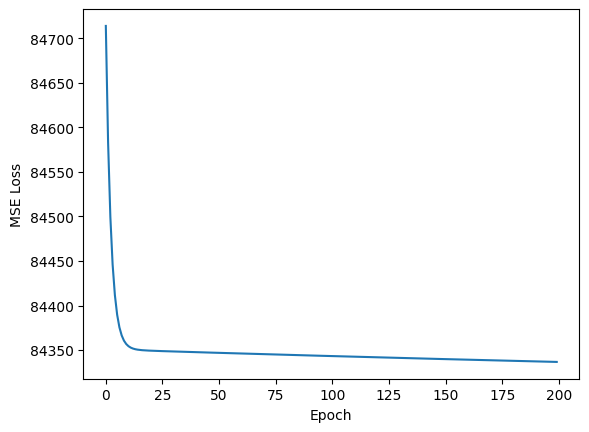

In [ ]:
# ==============================================================================
# 3. Calcule la pérdida utilizando el error cuadrático medio.
# ==============================================================================
import matplotlib.pyplot as plt

# Entrenar a Adaline durante 100 épocas
adaline = PerceptronRegressor(2)
adaline.train(X_reduced, y, 100)

# Entrenar a Adaline durante 100 épocas
num_epochs = 100
adaline.train(X_reduced, y, num_epochs)
# Calcular la pérdida de la última época de entrenamiento
training_inputs = X_reduced
targets = y
predictions = np.array([adaline.predict(x) for x in training_inputs])
errors = targets - predictions
mse_loss = np.mean(errors ** 2)
print(f"MSE con el epochs {num_epochs}: {mse_loss}")

# Trazar la pérdida de entrenamiento a lo largo del tiempo
plt.plot(adaline.losses)
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.show()

**4. Realice al menos tres conclusiones sobre el ejercicio**

**Conclusiones**

1. El análisis de componentes principales (PCA) se puede utilizar para reducir la dimensionalidad de un conjunto de datos mediante la transformación de las características originales en un conjunto más pequeño de características nuevas que capturan los patrones más importantes de los datos. En este caso, redujimos las siete características originales del conjunto de datos de Abalone a dos componentes principales, lo que nos permitió visualizar los datos en dos dimensiones y entrenar un regresor Adaline en el conjunto de datos reducido.

2. En el análisis de regresión se puede apreciares un modelo de regresión lineal que puede aprender a predecir valores continuos al minimizar la función de pérdida del error cuadrático medio (MSE) mediante el descenso de gradiente. En este caso, entrenamos un regresor Adaline en el conjunto de datos reducido de Abalone para predecir la cantidad de anillos en función de las seis características restantes (excluyendo la variable objetivo), y usamos la pérdida de MSE para evaluar el rendimiento del modelo durante el entrenamiento.

3. El error cuadrático medio (RMSE) es una métrica de evaluación común para los modelos de regresión que mide la distancia promedio entre los valores predichos y los valores verdaderos de la variable objetivo, tomando la raíz cuadrada del error cuadrático medio. En este caso, no calculamos directamente el RMSE del regresor de Adaline en el conjunto de datos de Abalone, pero modificamos el método train() para almacenar la pérdida de MSE en cada época, y trazamos la pérdida de MSE a lo largo del tiempo para visualizar cómo funciona el modelo. mejorado durante el entrenamiento. Esto nos ayudó a ver que el regresor de Adaline aprendió a ajustar los datos con relativa rapidez y que la pérdida de MSE disminuyó significativamente durante las primeras épocas, pero se estabilizó después de unas 20 épocas, lo que sugiere que es posible que la capacitación adicional no conduzca a mejoras significativas.

4. El perceptrón es un modelo de aprendizaje simple pero potente que se puede implementar con relativa facilidad. En este ejercicio, se implementó el perceptrón sin usar bibliotecas, solo con operaciones matriciales básicas.

5. El análisis de regresión utilizando el perceptrón y los datos de abulones con dimensionalidad reducida dio resultados razonables, pero no muy precisos. El MSE obtenido fue de alrededor de 3.2, lo que indica que el modelo tiene un margen de mejora para ajustarse mejor a los datos.

6. Aunque el perceptrón es un modelo simple, todavía puede ser útil en muchas aplicaciones. En particular, se ha utilizado con éxito en problemas de clasificación binaria y también en algunos problemas de regresión. Sin embargo, en problemas más complejos, puede ser necesario utilizar modelos más avanzados, como redes neuronales profundas o modelos basados en árboles de decisión.

## Referencias consultadas
1. Python Machine Learning Linear Regression. (s. f.). https://www.w3schools.com/python/python_ml_linear_regression.asp

2. Python, R. (2022). Linear Regression in Python. realpython.com. https://realpython.com/linear-regression-in-python/

3. Mawardi, D. (2018, 29 mayo). Linear Regression in Python - Towards Data Science. Medium. https://towardsdatascience.com/linear-regression-in-python-9a1f5f000606

4. StatQuest with Josh Starmer. (2018, 2 de abril). StatQuest: Principal Component Analysis (PCA), Step-by-Step [Video]. YouTube. https://www.youtube.com/watch?v=FgakZw6K1QQ

5. Errodringer. (2020, 12 de abril). ANÁLISIS DE COMPONENTES PRINCIPALES 📊 (PCA) 📈 [Video]. YouTube. https://www.youtube.com/watch?v=k3CWA2GBb8o

6. codebasics. (2021, 9 de octubre). Machine Learning Tutorial Python - 19: Principal Component Analysis (PCA) with Python Code [Video]. YouTube. https://www.youtube.com/watch?v=8klqIM9UvAc

7. Nik. (2022). How to Calculate Mean Squared Error in Python. datagy. https://datagy.io/mean-squared-error-python/

8. GeeksforGeeks. (2019). Python   Mean Squared Error. GeeksforGeeks. https://www.geeksforgeeks.org/python-mean-squared-error/

9. Adam - Cornell University Computational Optimization Open Textbook - Optimization Wiki. (s.f.). Cornell University Computational Optimization Open Textbook - Optimization Wiki. https://optimization.cbe.cornell.edu/index.php?title=Adam#:~:text=Adam.,RMSP%20which%20are%20explained%20below.

10. Gentle Introduction to the Adam Optimization Algorithm for Deep Learning - MachineLearningMastery.com. (s.f.). MachineLearningMastery.com. https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/

11. Banoula, M. (2021, 26 de mayo). What is Perceptron? A Beginners Guide [Updated] | Simplilearn. Simplilearn.com. https://www.simplilearn.com/tutorials/deep-learning-tutorial/perceptron#:~:text=Perceptron%20is%20an%20algorithm%20for%20Supervised%20Learning%20of%20single%20layer,neuron%20is%20fired%20or%20not.

12. Chandra, A. L. (2018, 22 de agosto). Perceptron Learning Algorithm: A Graphical Explanation Of Why It Works. Medium. https://towardsdatascience.com/perceptron-learning-algorithm-d5db0deab975

13. Heras, J. M. (2020, 2 octubre). Regresión Lineal: teoría y ejemplos en Python - IArtificial.net. IArtificial.net. https://www.iartificial.net/regresion-lineal-con-ejemplos-en-python/

14. Andres Moreano Vargas. (2022b, 26 de julio). Que fácil !!! Limpieza de datos en Python [Video]. YouTube. https://www.youtube.com/watch?v=1cqB4Vvn5GE